## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [8]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/20
61/61 [==============================] - 631s 10s/step - loss: 1.3489 - accuracy: 0.8334 - val_loss: 3.5145 - val_accuracy: 0.6667
Epoch 2/20
61/61 [==============================] - 611s 10s/step - loss: 0.7937 - accuracy: 0.9175 - val_loss: 2.8847 - val_accuracy: 0.6667
Epoch 3/20
61/61 [==============================] - 615s 10s/step - loss: 0.6704 - accuracy: 0.9313 - val_loss: 1.3549 - val_accuracy: 0.7222
Epoch 4/20
61/61 [==============================] - 631s 10s/step - loss: 0.5503 - accuracy: 0.9467 - val_loss: 0.3595 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 620s 10s/step - loss: 0.6215 - accuracy: 0.9503 - val_loss: 1.2359 - val_accuracy: 0.7778
Epoch 6/20
61/61 [==============================] - 607s 10s/step - loss: 0.4667 - accuracy: 0.9534 - val_loss: 0.3798 - va

In [18]:
import matplotlib.pyplot as plt

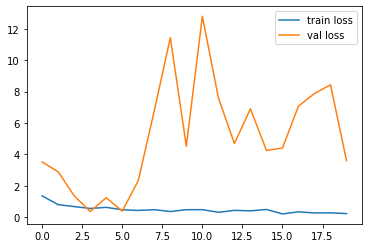

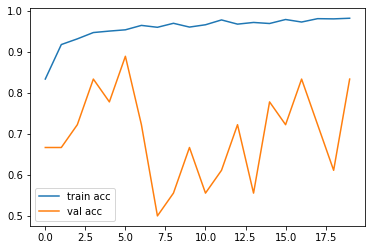

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[2.6808105e-36, 0.0000000e+00, 1.0000000e+00, 1.8370070e-18],
       [1.0045805e-22, 0.0000000e+00, 1.0990652e-02, 9.8900932e-01],
       [1.0000000e+00, 1.8934109e-19, 4.4255042e-24, 1.9999315e-12],
       [3.6861764e-11, 6.4548550e-07, 2.2745370e-08, 9.9999940e-01],
       [0.0000000e+00, 1.0000000e+00, 6.9153075e-25, 4.6151598e-15],
       [4.1997270e-17, 0.0000000e+00, 1.0000000e+00, 4.7868319e-14],
       [0.0000000e+00, 0.0000000e+00, 9.3569409e-15, 1.0000000e+00],
       [0.0000000e+00, 2.2275852e-16, 3.5796903e-30, 1.0000000e+00],
       [9.9999964e-01, 1.9598323e-30, 3.7020243e-07, 9.7255683e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [8.5356586e-23, 0.0000000e+00, 1.0000000e+00, 1.7280312e-21],
       [8.7656132e-32, 2.5637427e-21, 1.0000000e+00, 0.0000000e+00],
       [4.3967797e-23, 5.3547802e-07, 2.9066189e-13, 9.9999952e-01],
       [5.7445129e-19, 9.9974626e-01, 9.4721066e-20, 2.5378182e-04],
       [1.0000000e+00, 1.3374600e-

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([2, 3, 0, 3, 1, 2, 3, 3, 0, 3, 2, 2, 3, 1, 0, 3, 3, 2], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

In [27]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__